In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [2]:
# 다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# 데이터 scale
from sklearn.preprocessing import scale

In [3]:
ds_con= pd.read_csv("./과제파일/체질검사.csv",engine = "python")
# ds_const.isnull().sum() # 결측치 없음.
ds_con.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## STEP 1. 목표변수 FAT을 예측하기 위한 새로운 파생변수 BMI 생성

In [4]:
# bmi = weight*0.45/(height*2.54*0.01)**2
ds_con_bmi = pd.DataFrame(ds_con['WEIGHT']*0.45/(ds_con['HEIGHT']*2.54*0.01)**2, columns = ['BMI']).round(3)
ds_con_bmi = pd.concat([ds_con,ds_con_bmi], axis = 1)
ds_con_bmi

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.524
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.083
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.839
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.790
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.377
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.732
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.155
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,19.960


## -이상치 파악

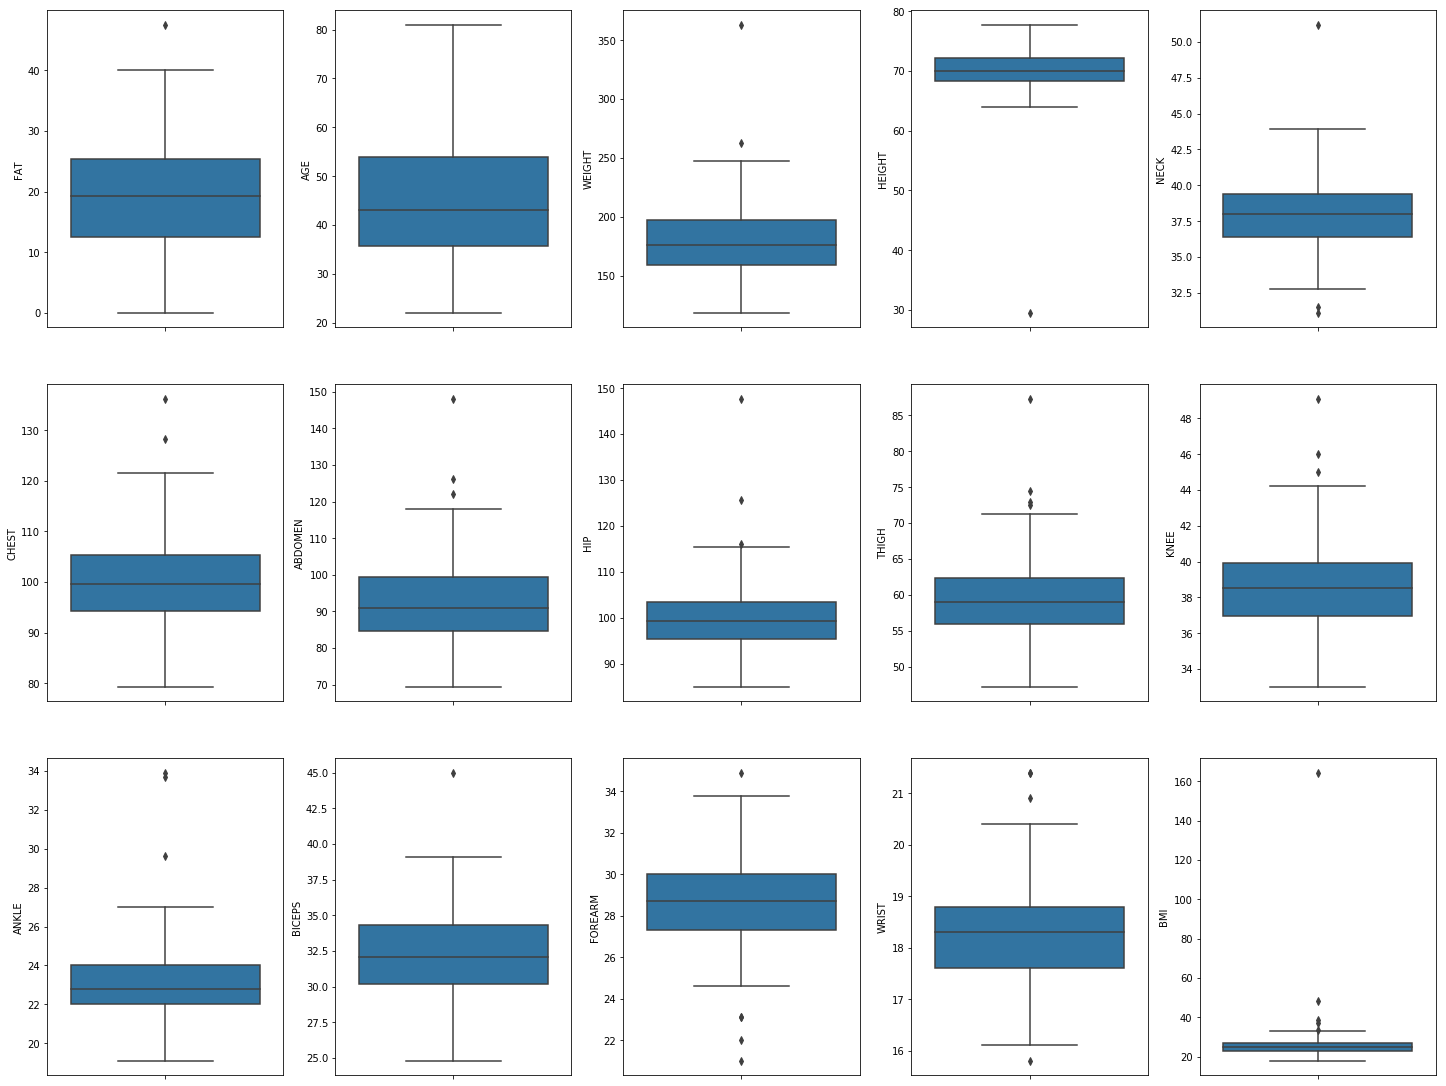

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize = (20,15))
index = 0
axs = axs.flatten()
for k,v in ds_con_bmi.items():
    sns.boxplot(y=k, data=ds_con_bmi, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### HEIGHT가 30ft. 밑 / BMI 160 넘는 사람 제거 필요 / 데이터 전체를 왜곡시킴.
### BMI가 실제로 40을 넘어서는 경우도 있기 때문에 0번은 이상치로 생각하지 않음.

In [6]:
pd.Index.argmin(ds_con_bmi["HEIGHT"])

78

In [7]:
ds_con_bmi.loc[78:78]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.307


### FAT(체지방률 가정)이 0인 사람들이 있다.  불가능한 상황. 그래서 0점 대는 이상치로 생각하고 제거.

In [8]:
df_filtered = ds_con_bmi[(ds_con_bmi["FAT"] < 3)]
df_filtered

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
21,0.0,40,118.50,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5,17.875
150,0.7,35,125.75,65.5,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9,20.444


In [9]:
ds_con_bmi = ds_con_bmi[ds_con_bmi["HEIGHT"] > 30]
ds_con_bmi = ds_con_bmi[ds_con_bmi["FAT"] >= 3]
ds_con_bmi.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.524
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.083
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.839
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293


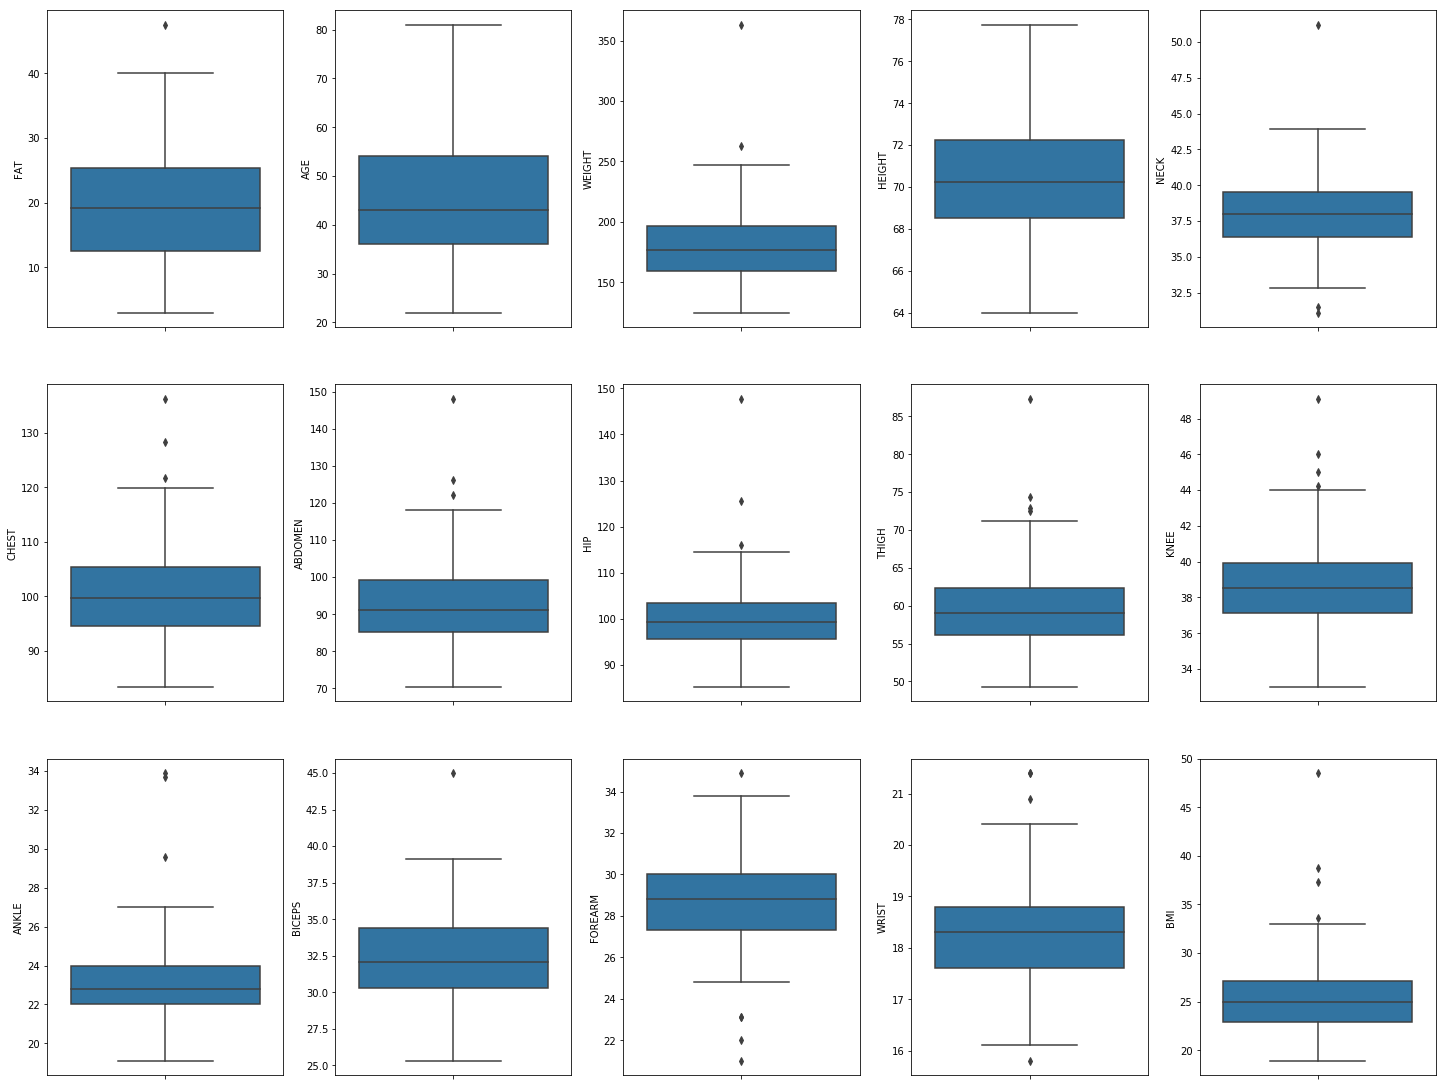

In [10]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize = (20,15))
index = 0
axs = axs.flatten()
for k,v in ds_con_bmi.items():
    sns.boxplot(y=k, data=ds_con_bmi, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## -회귀분석을 위해 Target, Explanatory variables 나누기 & 절편 추가

In [11]:
# 목표변수, 설명변수 나누기
ds_con_bmi_y = ds_con_bmi["FAT"]
ds_con_bmi_x = ds_con_bmi.drop("FAT", axis = 1, inplace = False)
print(ds_con_bmi_y.shape)
print(ds_con_bmi_x.shape)

(249,)
(249, 14)


In [12]:
# 절편 추가
ds_con_bmi_x_const = sm.add_constant(ds_con_bmi_x)
print(ds_con_bmi_x_const.shape)
ds_con_bmi_x_const.head()

(249, 15)


,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.524
1,1.0,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.083
2,1.0,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422
3,1.0,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.839
4,1.0,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293


## STEP 2. 변수 간 경향성 파악

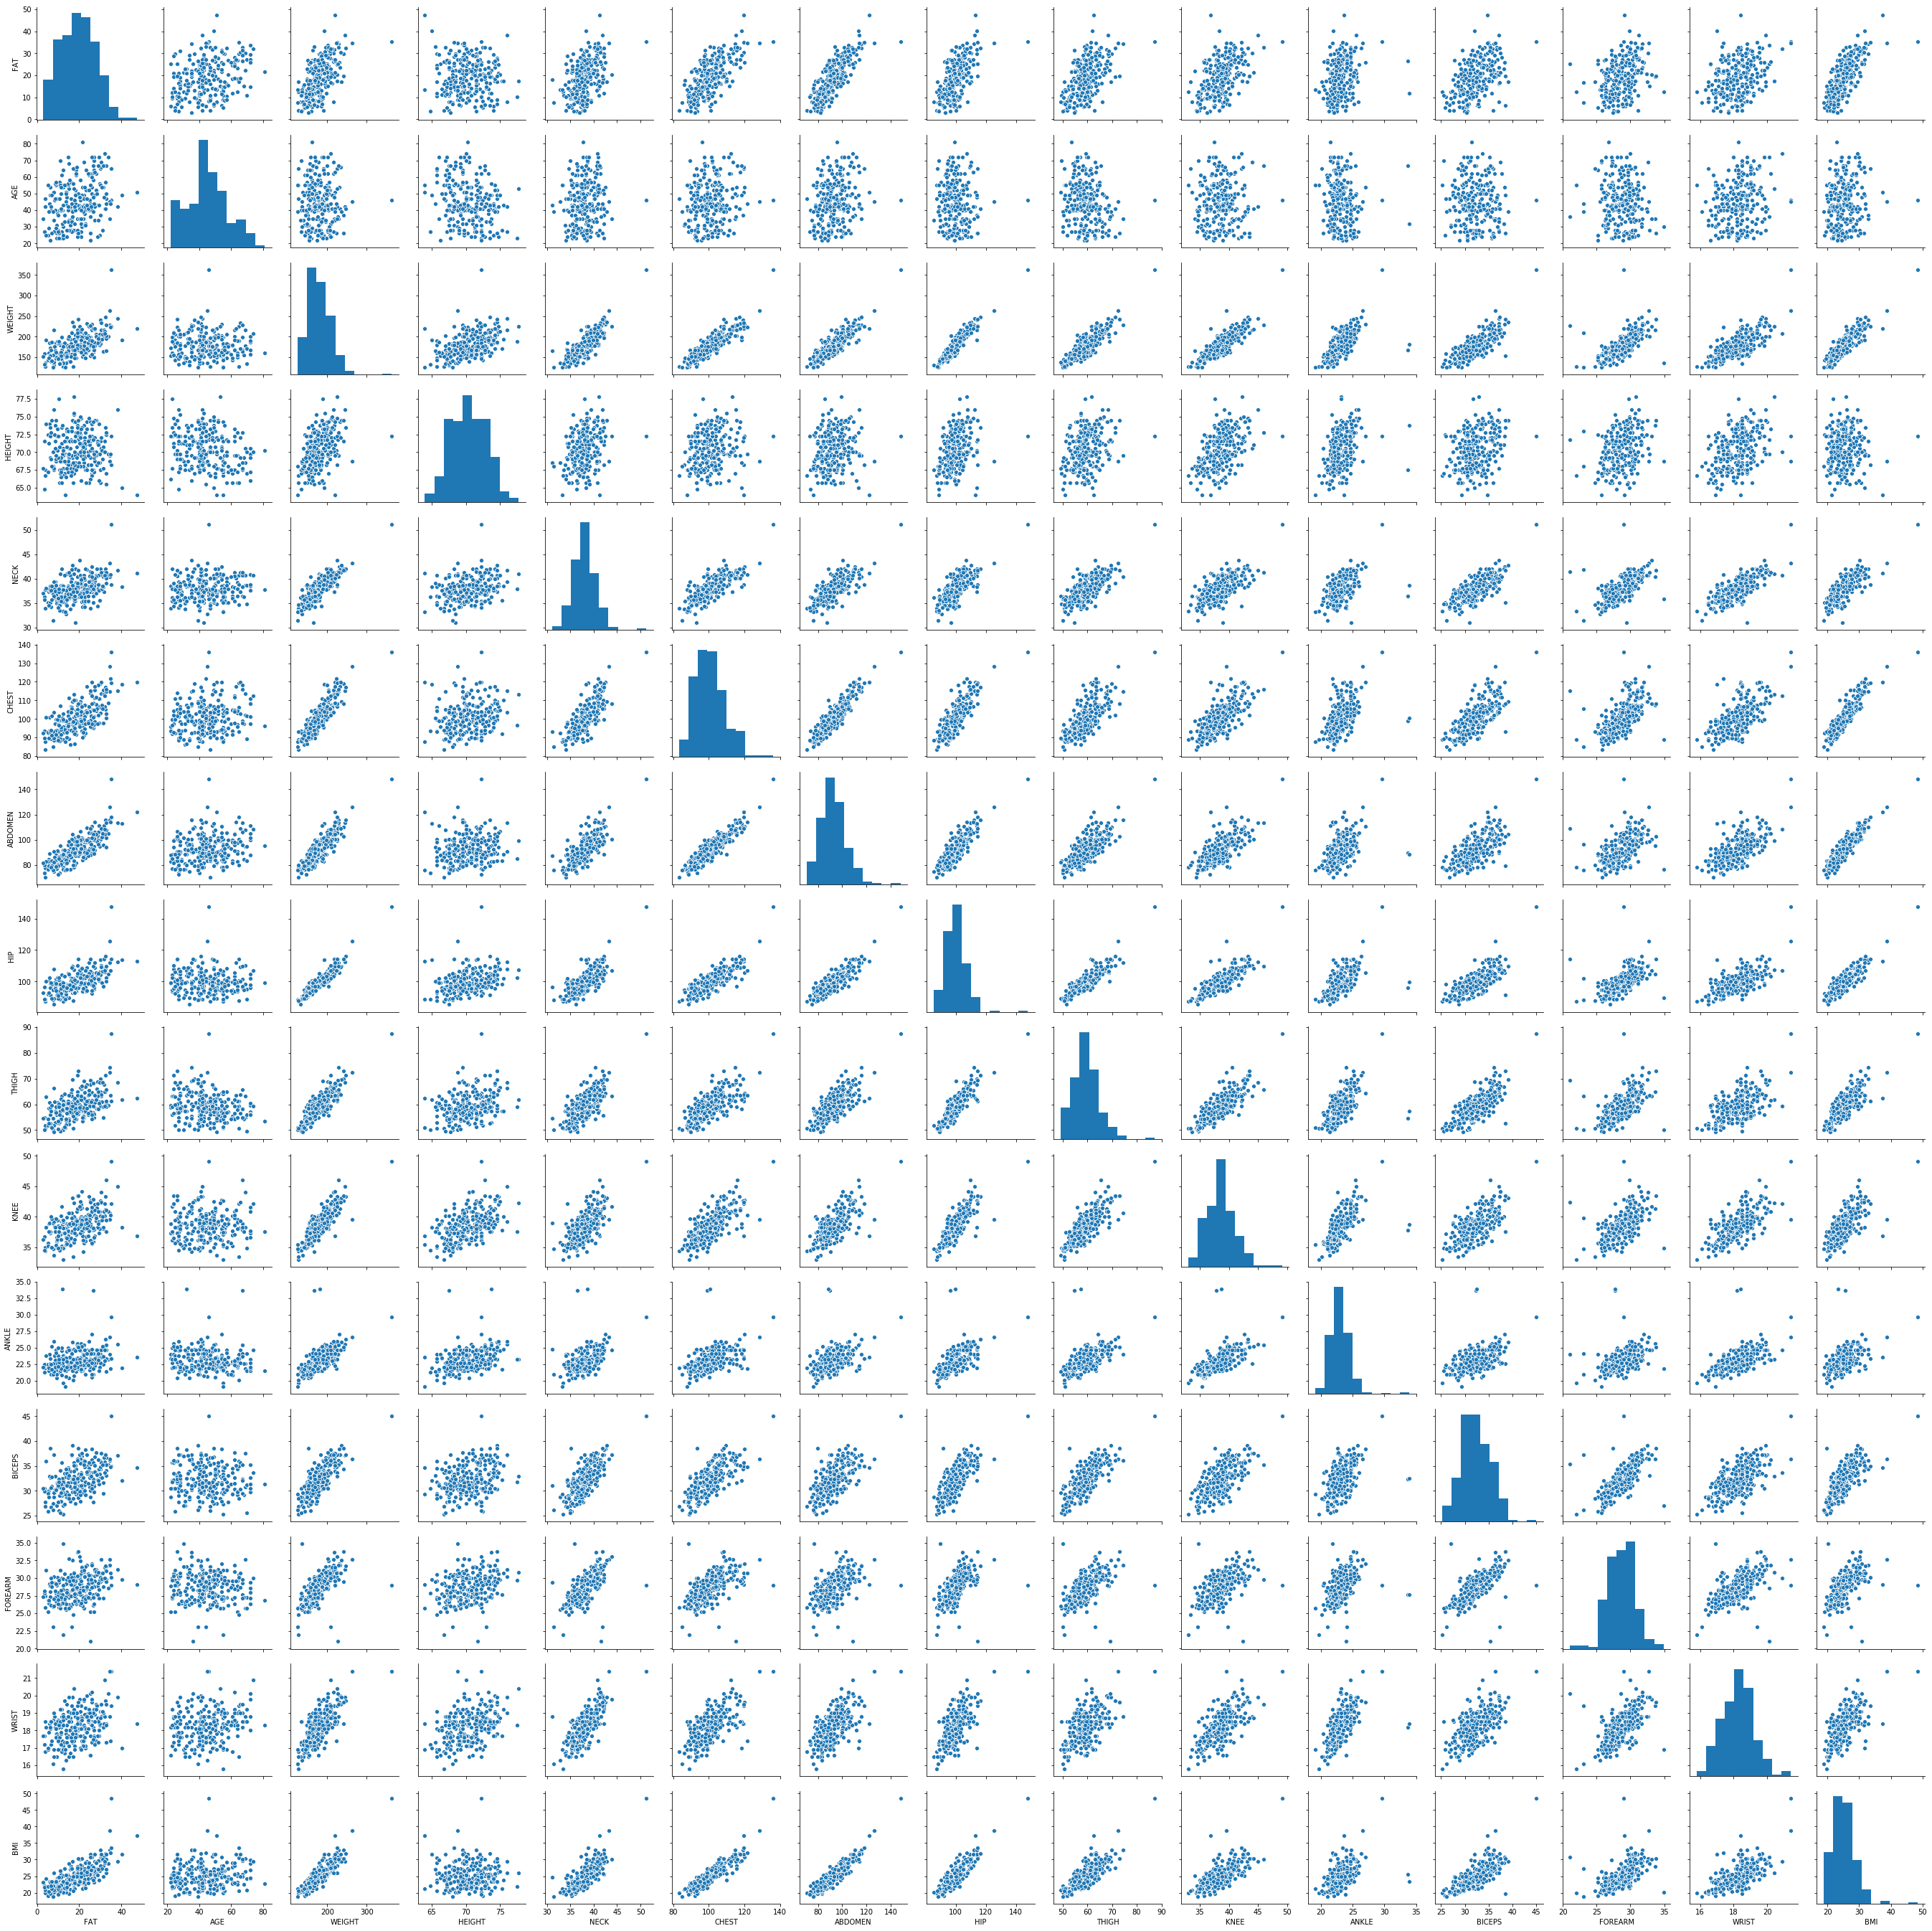

In [13]:
# Scatter Plot Matrix
sns.pairplot(ds_con_bmi)

### FAT, AGE, HEIGHT를 제외한 변수들은 다른 변수와 대부분 선형성을 보인다.

In [14]:
# Correlation Analysis
ds_con_bmi.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.289,0.597,-0.049,0.482,0.694,0.807,0.608,0.536,0.487,0.250,0.475,0.344,0.336,0.718
AGE,0.289,1.000,-0.022,-0.255,0.107,0.172,0.226,-0.059,-0.215,0.010,-0.111,-0.052,-0.094,0.209,0.109
WEIGHT,0.597,-0.022,1.000,0.479,0.830,0.892,0.884,0.942,0.866,0.849,0.608,0.795,0.621,0.729,0.886
HEIGHT,-0.049,-0.255,0.479,1.000,0.308,0.215,0.176,0.368,0.331,0.497,0.389,0.303,0.311,0.388,0.023
NECK,0.482,0.107,0.830,0.308,1.000,0.783,0.753,0.741,0.700,0.672,0.472,0.727,0.615,0.739,0.781
CHEST,0.694,0.172,0.892,0.215,0.783,1.000,0.914,0.828,0.723,0.712,0.473,0.724,0.569,0.656,0.909
ABDOMEN,0.807,0.226,0.884,0.176,0.753,0.914,1.000,0.871,0.759,0.728,0.443,0.677,0.491,0.617,0.920
HIP,0.608,-0.059,0.942,0.368,0.741,0.828,0.871,1.000,0.891,0.816,0.554,0.737,0.539,0.636,0.882
THIGH,0.536,-0.215,0.866,0.331,0.700,0.723,0.759,0.891,1.000,0.790,0.534,0.759,0.560,0.561,0.809
KNEE,0.487,0.010,0.849,0.497,0.672,0.712,0.728,0.816,0.790,1.000,0.607,0.672,0.547,0.667,0.702


### 수치상으론 WEIGHT, CHEST, ABDOMEN, HIP이 R 수치상 선형성 상위 변수들이다. (다중공선성 의심)
### Target variable FAT과 R 수치가 높은 상위 3개 Explanatory variables는 ABDOMEN, BMI, CHEST 순이다.
### (후진제거법 사용 이후에 해석해보기)

## STEP 3. 회귀 모델 생성 & 전체 설명변수 대상으로 다중 공선성 검토

In [15]:
# Generate Regression Model
reg_multi_model = sm.OLS(ds_con_bmi_y, ds_con_bmi_x_const)
# Fitting
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary()) # 95% 신뢰수준

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     49.10
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.70e-61
Time:                        23:14:54   Log-Likelihood:                -706.14
No. Observations:                 249   AIC:                             1442.
Df Residuals:                     234   BIC:                             1495.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.8840     54.218     -2.359      0.0

### 해석
    1. No. Observation(분석 자료 수): 249
    * Df Residuals(잔차 자유도): 238
    * Df Model(모델 자유도): 14
    2. ANOVA 분석결과
    -> p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
    3. 설명력(Adj. R-squared): 73.1%
    4. 회귀계수 검정
    -> 현재 모델을 후진제거법으로 변경할 필요성이 있기 때문에 의미가 중요하진 않지만, ABDOMEN, WEIGHT, BMI 등 비만도와 관련된 변수들을 주목할 필요가 있어보인다.

In [16]:
# 데이터 테이블 생성 -> 값 입력
ds_vif = pd.DataFrame()
# 변수명 입력
ds_vif["variable"] = ds_con_bmi_x_const.columns
# variance_inflation_factor 다중공선성 함수, exog: 설명변수 데이터, exog_idx: 변수 인덱스
ds_vif["VIF"] = [variance_inflation_factor(ds_con_bmi_x_const.values,i) for i in range(ds_con_bmi_x_const.shape[1])]
# VIF 낮은 순 정렬
ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

,variable,VIF
10,ANKLE,1.921
12,FOREARM,2.213
1,AGE,2.290
13,WRIST,3.320
11,BICEPS,3.609
4,NECK,4.349
9,KNEE,4.728
8,THIGH,7.723
5,CHEST,10.702
6,ABDOMEN,13.021


### VIF(분산팽창계수) 값이 큰 변수: WEIGHT, BMI, HEIGHT
### WEIGHT, HEIGHT는 VIF수치가 커서 다중공선성이 있고, 파생변수 BMI에 영향을 주고 있음.
### WEIGHT와 HEIGHT를 제거해보고 분석 시작.

In [17]:
ds_con_bmi = ds_con_bmi.drop(["WEIGHT","HEIGHT"], axis = 1, inplace = False)
ds_con_bmi.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.524
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.083
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.839
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293


In [18]:
# 목표변수, 설명변수 나누기
ds_con_bmi_y = ds_con_bmi["FAT"]
ds_con_bmi_x = ds_con_bmi.drop("FAT", axis = 1, inplace = False)
print(ds_con_bmi_y.shape)
print(ds_con_bmi_x.shape)

(249,)
(249, 12)


In [19]:
# 절편 추가
ds_con_bmi_x_const = sm.add_constant(ds_con_bmi_x)
print(ds_con_bmi_x_const.shape)
ds_con_bmi_x_const.head()

(249, 13)


,const,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.524
1,1.0,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.083
2,1.0,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422
3,1.0,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.839
4,1.0,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293


## STEP 4. 후진제거법을 이용한 변수 선택

In [32]:
# 후진제거법(Recursive Feature Elimination,RFE)함수 사용
model = LinearRegression()
# 전체의 변수 중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator=model,n_features_to_select=5).fit(ds_con_bmi_x,ds_con_bmi_y)
# 선택된 변수
selected_cols = ds_con_bmi_x.columns[rfe.support_]

# 제거된 변수
removed_cols = ds_con_bmi_x.columns[~rfe.support_]
print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [33]:
ds_con_bmi_x_rfe = sm.add_constant(ds_con_bmi_x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(ds_con_bmi_y,ds_con_bmi_x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     127.8
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           6.01e-66
Time:                        23:16:55   Log-Likelihood:                -716.28
No. Observations:                 249   AIC:                             1445.
Df Residuals:                     243   BIC:                             1466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2783      6.232      0.687      0.4

### 해석
    1. No. Observation(분석 자료 수): 249
    * Df Residuals(잔차 자유도): 243
    * Df Model(모델 자유도): 5
    2. ANOVA 분석결과
    -> p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
    3. 설명력(Adj. R-squared): 71.9%
    -> 비교적 높은 설명력을 보인다.
    4. 회귀계수 검정
    -> 절편을 제외한 모든 변수들의 p값이 0.05보다 작으므로 유의한 feature라고 할 수 있다.

In [34]:
ds_vif = pd.DataFrame()
# 변수명 입력
ds_vif["variable"] = ds_con_bmi_x_rfe.columns
# variance_inflation_factor 다중공선성 함수, exog: 설명변수 데이터, exog_idx: 변수 인덱스
ds_vif["VIF"] = [variance_inflation_factor(ds_con_bmi_x_rfe.values,i) for i in range(ds_con_bmi_x_rfe.shape[1])]
# VIF 낮은 순 정렬
ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

,variable,VIF
4,FOREARM,1.735
5,WRIST,2.391
1,NECK,3.525
3,HIP,4.652
2,ABDOMEN,4.675
0,const,511.337


### VIF가 모두 5 미만으로 다중공선성의 문제가 없어졌음을 알 수 있다.
### 또한, WEIGHT와 HEIGHT의 파생변수 BMI가 체지방률에 큰 영향을 주는 설명변수가 아니란 것을 알수 있다.

## 표준화 회귀계수로 Feature들의 중요도 보기

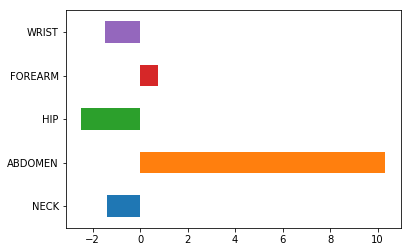

In [35]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_con_bmi_x_scaled = scale(ds_con_bmi_x_const[selected_cols])
# 후진제거법에 의하여 선택된 데이터에 상수 1 입력
ds_con_bmi_x_scaled = sm.add_constant(ds_con_bmi_x_scaled)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_con_bmi_y,ds_con_bmi_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

### 결론적으로 목표변수 FAT에 대해 ABDOMEN의 영향력이 압도적으로 크다. 
### 그래서 HIP WRIST NECK의 계수가 음수를 보이는 기이한 현상이 일어난다.
### **하지만 중요한 것은 ABDOMEN이 비만도를 판단하는데 유의미하게 큰 영향을 미친다는 것을 알 수 있다.